In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

%matplotlib inline

In [2]:
def linear(x):
    return(2*x)

def MSE_func(y_pred, y_true):
    err = y_pred - y_true
    return((err @ err) / len(err))

In [3]:
x = np.arange(-30,31,1)
y_true = linear(x)

a = np.random.rand()
y_pred = a*x

In [4]:
MSE_func(y_pred, y_true)

398.81622178194965

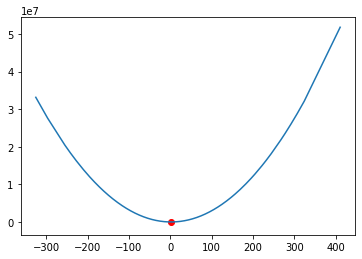

In [5]:
rand_a = np.sort(np.random.randn(1000))*100
mse_errors = [MSE_func(i*x, y_true) for i in rand_a]
plt.plot(rand_a, mse_errors)
plt.scatter(a, MSE_func(a*x, y_true), color='r')

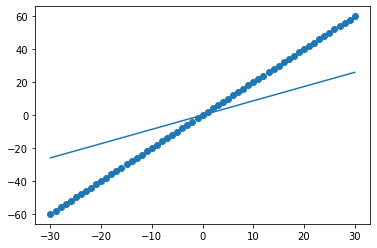

In [7]:
plt.scatter(x, y_true)
plt.plot(x, y_pred)

In [10]:
def lin_func(param, x):
    return(param*x)

def derivative(fun, seeked_fun, curr_a, x, y_true, delta):
    return((fun(seeked_fun(curr_a + delta, x), y_true) - fun(seeked_fun(curr_a, x), y_true))/delta)

def grad_descent(fun, seeked_fun, start_point, x, y_true, alpha, derivative, delta, iters, print_mse=False, print_func=False):
    history = []
    rand_a = np.sort(np.random.randn(1000))*300
    for i in range(0,iters):
        if i == 0:
            current_a = start_point
            
        y_pred = seeked_fun(current_a, x)
        grad = derivative(fun, seeked_fun, current_a, x, y_true, delta)
        history.append([current_a, grad])
        
        current_a = current_a - alpha*grad
        
        a_grad= np.array([i[0] for i in history])
        mse_grad = [MSE_func(seeked_fun(a, x), y_true) for a in a_grad]
        
        clear_output(wait=True)
        
        if print_mse:
            mse_errors = [MSE_func(seeked_fun(a, x), y_true) for a in rand_a]
            plt.figure(figsize=(16,8))
            plt.plot(rand_a, mse_errors)
            plt.scatter(a_grad, mse_grad, color='r')
            plt.show()
            
        if print_func:
            plt.figure(figsize=(10,8))
            plt.scatter(x,y_true)
            plt.plot(x, y_pred)
            plt.xlim(np.min(x),np.max(x))
            plt.ylim(np.min(y_true),np.max(y_true))
            plt.show()
        
        time.sleep(0.5)    #sleep
    return history, current_a

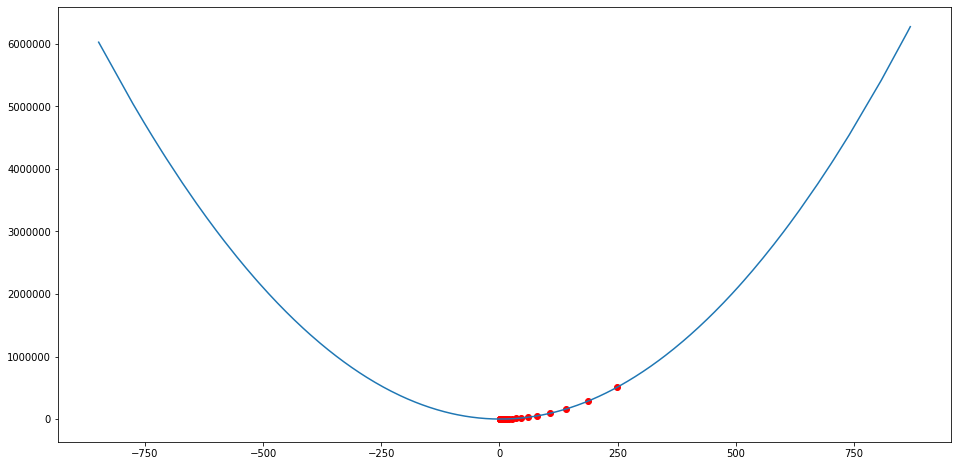

In [12]:
rand_start = np.random.randn()*300
x = np.arange(-5, 5 ,0.1)
y_true = linear(x)
#Alphas:
#linear function: ok - 0.1, 0.01
history, a_param = grad_descent(MSE_func, lin_func, rand_start, x, y_true, 0.015, derivative, 1e-6, 30, print_func=False, print_mse=True)

In [13]:
history

[[249.35648753148493, 4123.432736378163],
 [187.50499648581248, 3092.3683079890907],
 [141.11947186597612, 2319.121587788686],
 [106.33264804914583, 1739.2252484569326],
 [80.24426932229184, 1304.3319995631464],
 [60.679289328844646, 978.1837579794228],
 [46.006532959153304, 733.5889094974846],
 [35.002699316691036, 550.1550076587591],
 [26.75037420180965, 412.5887462578248],
 [20.561543007942277, 309.42093007979565],
 [15.920229056745342, 232.05022625916172],
 [12.439475662857916, 174.02606761152128],
 [9.829084648685097, 130.51084948756397],
 [7.871421906371637, 97.87661150539861],
 [6.403272733790658, 73.40256485122154],
 [5.302234261022335, 55.048253472023134],
 [4.476510458941988, 41.28343768883269],
 [3.8572588936094974, 30.960514102673642],
 [3.3928511820693927, 23.21883754063947],
 [3.0445686189598007, 17.412967215690855],
 [2.783374110724438, 13.058854762881822],
 [2.5874912892812105, 9.793488128462258],
 [2.4405889673542767, 7.344626421934564],
 [2.330419571025258, 5.50810258

### Analytically

In [ ]:
def fun(x):
    return(2*x[0] + 1*x[1])

In [31]:
X = np.array([np.arange(-5,5,0.1), np.ones(100)]).T
y = np.array([fun(x) for x in X])

In [44]:
analytically = np.linalg.inv(X.T@X)@X.T@y

In [45]:
analytically

array([2., 1.])